In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [662]:
finance_dataset = pd.read_csv('/kaggle/input/sml-project/fraud_payment_data_JPMorgan.csv')
finance_dataset = pd.DataFrame(finance_dataset)

In [663]:
finance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 148.6+ MB


In [664]:
finance_dataset.shape

(1498177, 13)

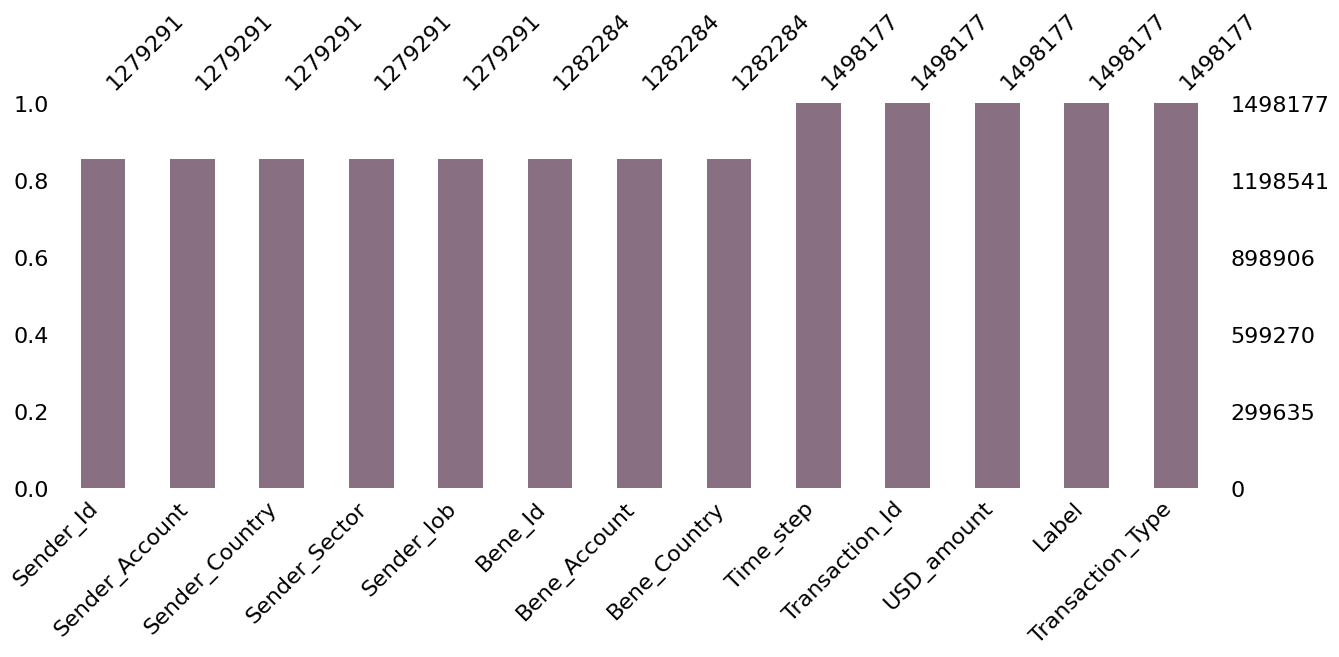

In [665]:
plt.figure(figsize = (15, 8))
msno.bar(finance_dataset, figsize = (15,5), sort = 'ascending', color = "#896F82")
plt.show()

In [666]:
finance_dataset.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


In [667]:
# Check Duplicates if any 
print("Number of Duplicates : ", finance_dataset.duplicated().sum())

Number of Duplicates :  0


In [668]:
finance_dataset.columns

Index(['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account',
       'Sender_Country', 'Sender_Sector', 'Sender_lob', 'Bene_Id',
       'Bene_Account', 'Bene_Country', 'USD_amount', 'Label',
       'Transaction_Type'],
      dtype='object')

In [669]:
finance_dataset = finance_dataset.drop(columns = ['Time_step','Transaction_Id'],axis = 'columns')

In [670]:
finance_dataset.head()

,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


In [671]:
cols = finance_dataset.columns.tolist()
new_position = 2

cols.insert(new_position, cols.pop(cols.index('Bene_Account')))
finance_dataset = finance_dataset[cols]

cols = finance_dataset.columns.tolist()
new_position = 1

cols.insert(new_position, cols.pop(cols.index('Bene_Id')))
finance_dataset = finance_dataset[cols]

In [672]:
finance_dataset.head()

,Sender_Id,Bene_Id,Sender_Account,Bene_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Country,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-10098,NaN,ACCOUNT-10108,NaN,USA,35537.0,CCB,NaN,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-10098,CLIENT-10100,ACCOUNT-10109,ACCOUNT-10106,USA,15287.0,CCB,CANADA,622.78,0,QUICK-PAYMENT
2,NaN,JPMC-CLIENT-9812,NaN,ACCOUNT-9826,NaN,NaN,NaN,USA,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-9812,JPMC-CLIENT-9814,ACCOUNT-9825,ACCOUNT-9824,USA,38145.0,CCB,USA,989.09,0,PAY-CHECK
4,NaN,JPMC-CLIENT-9789,NaN,ACCOUNT-9800,NaN,NaN,NaN,USA,786.78,0,DEPOSIT-CHECK


In [673]:
print(finance_dataset['Sender_lob'].nunique())

1


In [674]:
# drop sender_lob since these are just one number
finance_dataset = finance_dataset.drop(columns = ['Sender_lob','Sender_Account','Bene_Account'],axis = 'columns')

In [675]:
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           4121
Bene_Id             5136
Sender_Country      4121
Sender_Sector       4121
Bene_Country        5136
USD_amount             0
Label                  0
Transaction_Type       0
dtype: int64

In [676]:
print((finance_dataset['Label'] == 1).sum())

30819


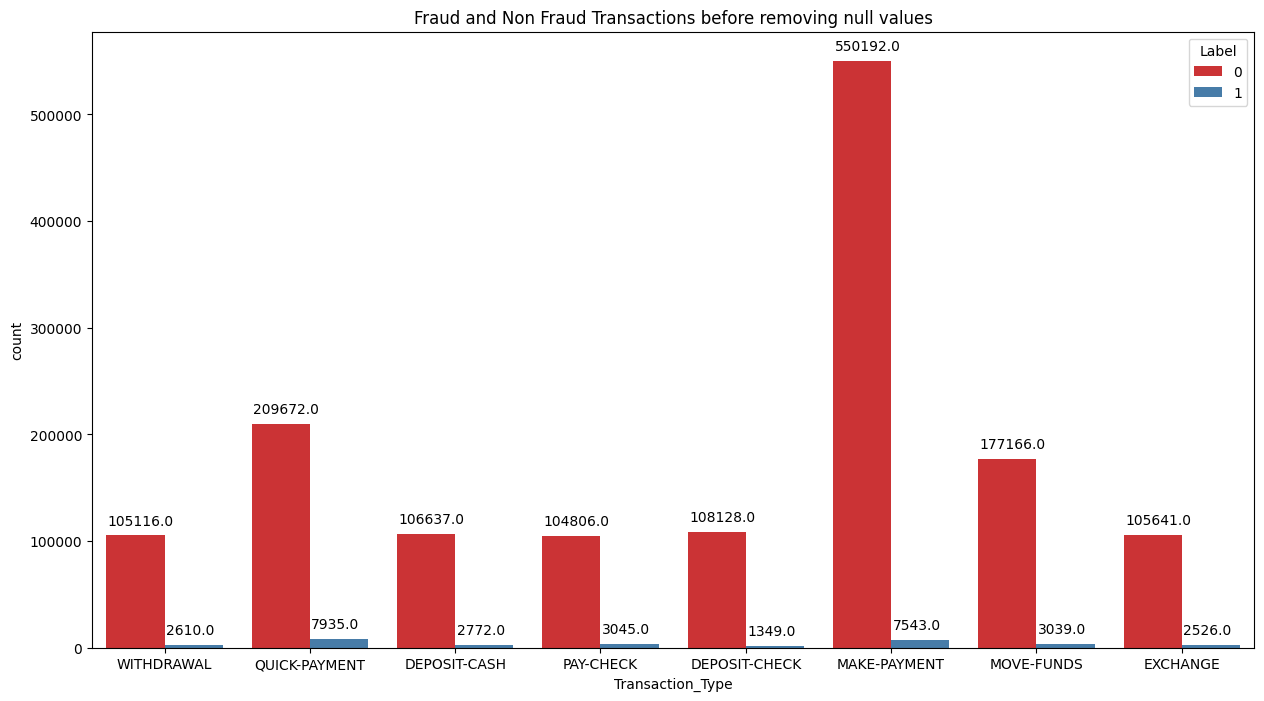

In [677]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data =  finance_dataset, x = "Transaction_Type", hue="Label", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions before removing null values')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

In [679]:
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           4121
Bene_Id             5136
Sender_Country      4121
Sender_Sector       4121
Bene_Country        5136
USD_amount             0
Label                  0
Transaction_Type       0
dtype: int64

In [680]:
## Handling Null values for Sender-sector field using mean of "fraud" and "non-fraud"

data = pd.Series(finance_dataset['Sender_Sector'])
nan_indices = data.isna()
Label = pd.Series(finance_dataset['Label'])
mean_1,cntr1 = 0,0
mean_0,cntr0 = 0,0
for i in range(len(nan_indices)):
  if nan_indices[i]==0 and (Label[i] == 1):
    mean_1 += data[i]
    cntr1 += 1
  elif nan_indices[i]==0 and (Label[i] == 0):
    mean_0 += data[i]
    cntr0 += 1

mean_1 /= cntr1
mean_0 /= cntr0

for i in range(len(nan_indices)):
  if nan_indices[i]==1 and (Label[i] == 1):
    data[i] = mean_1
  elif nan_indices[i]==1 and (Label[i] == 0):
    data[i] = mean_0

In [681]:
print("Mean of sender sector with Label 1:",mean_1)
print("Mean of sender sector with Label 0:",mean_0)
finance_dataset['Sender_Sector'] = data

Mean of sender sector with Label 1: 25075.31878792419
Mean of sender sector with Label 0: 25020.183490567168
